Downloading the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv') 

# check the first 5 rows of the dataset
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
print(data.head())
print(data.info())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [3]:
x= data.iloc[:,[5.6]].values
y= data.iloc[:, 17].values 
print(x)
print(y)
x.shape

[[  0.  ]
 [ 64.  ]
 [  0.  ]
 ...
 [184.25]
 [346.  ]
 [ 21.25]]
[False False False ... False False False]


(12330, 1)

Applying the KMeans library

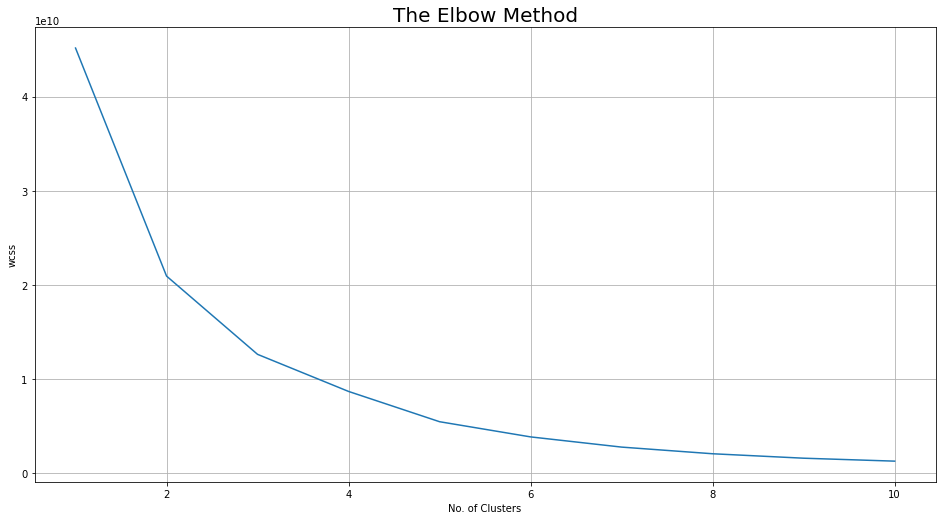

In [4]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

[0 0 0 ... 0 0 0]
[[5.93844233e+02 2.52331546e-02]
 [3.46379586e+03 7.11728278e-03]
 [1.10534982e+04 5.99298611e-03]]


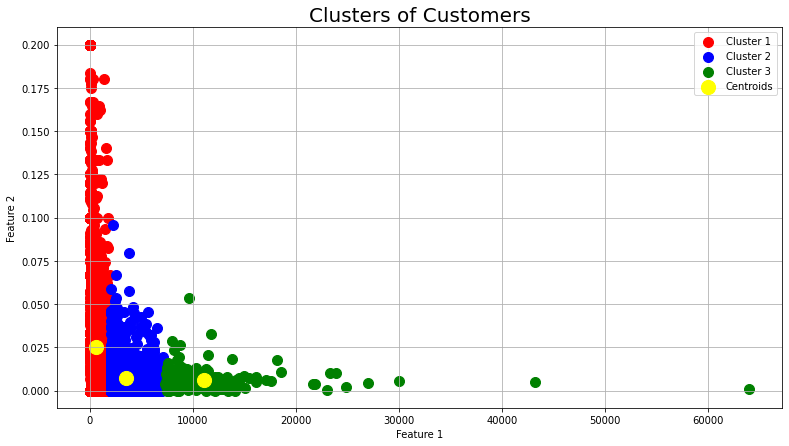

In [5]:
# Correct column selection for x and y
x = data.iloc[:, [5, 6]].values  # Replace 5 and 6 with the correct column indices for clustering
y = data.iloc[:, 17].values      # Ensure column 17 exists and is relevant

# Now we will be using the KMeans algorithm to cluster the data into 3 clusters.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0,
    algorithm='full',
    tol=0.001
)
km.fit(x)
labels = km.labels_
print(labels)
print(km.cluster_centers_)

# Plot the clusters
plt.rcParams['figure.figsize'] = (13, 7)
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

plt.title('Clusters of Customers', fontsize=20)
plt.xlabel('Feature 1')  # Replace with the actual feature name
plt.ylabel('Feature 2')  # Replace with the actual feature name
plt.legend()
plt.grid()
plt.show()

[0 0 0 ... 0 0 0]
[[5.93844233e+02 2.52331546e-02]
 [3.46379586e+03 7.11728278e-03]
 [1.10534982e+04 5.99298611e-03]]


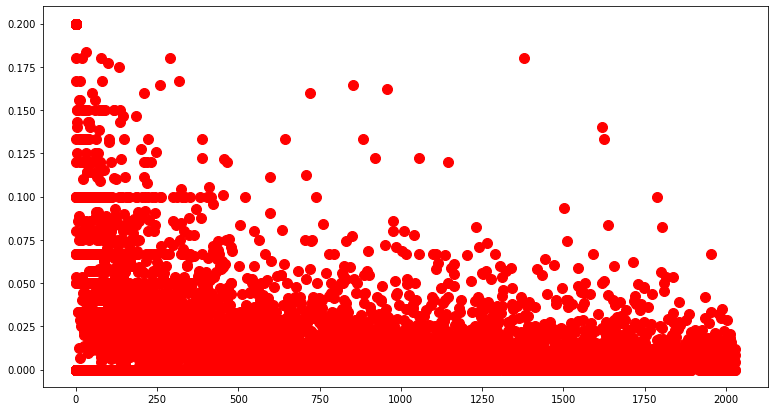

In [6]:
# Now we wil be using the KMeans algorithm to cluster the data into 3 clusters. 
km = KMeans(n_clusters = 3,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
km.fit(x)
labels = km.labels_
print(labels)
print(km.cluster_centers_)

plt.rcParams['figure.figsize'] = (13, 7)
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')


Adjusted rand index: 
0.0948176535005145


c:\Users\parek\AppData\Local\Programs\Python\Python36\lib\site-packages\scikitplot\metrics.py:124: RuntimeWarning:

invalid value encountered in true_divide



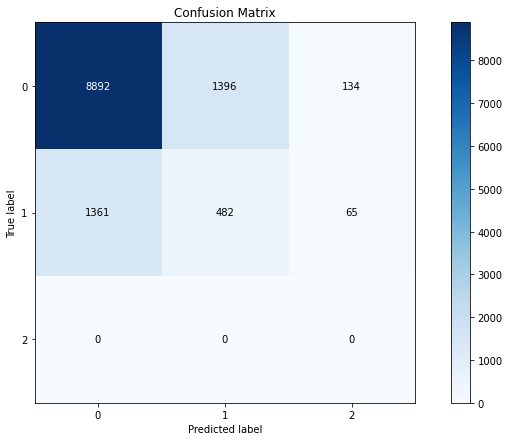

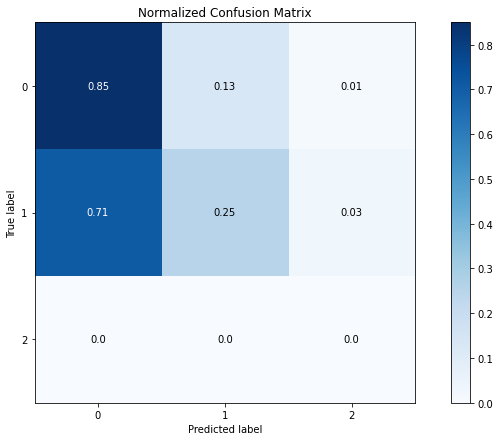

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
!pip install scikit-plot
import scikitplot as skplt

# Encode the true labels
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])  # Ensure 'Revenue' column exists in the dataset

# Use the predicted cluster labels from KMeans
labels_pred = labels  # Replace y_means with labels

# Print adjusted rand index, which measures the similarity of the two assignments
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

# Plot confusion matrix
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

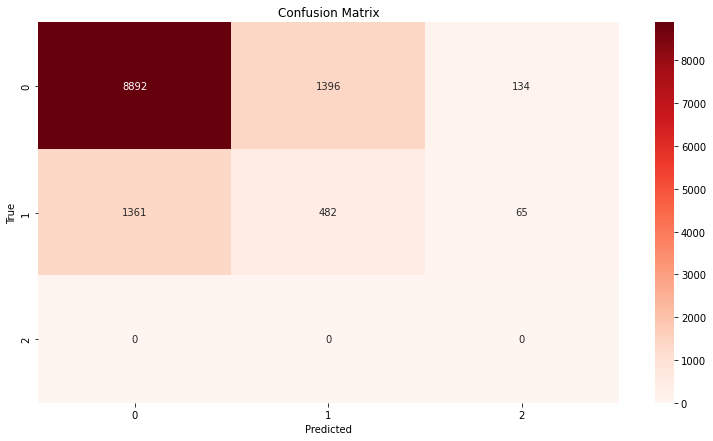

In [16]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_true, labels_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_val, nbm_pred)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_grid_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_val, svm_grid_pred)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_grid_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_grid_pred)
roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_val, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
fpr_abm, tpr_abm, threshold_abm = metrics.roc_curve(y_val, abm_grid_pred)
roc_auc_abm = metrics.auc(fpr_abm, tpr_abm)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC GB = %0.2f' % roc_auc_gbm)
plt.plot(fpr_abm, tpr_abm, 'm', label = 'AUC AB = %0.2f' % roc_auc_abm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

NameError: name 'y_val' is not defined